# Звіт з виконання домашньої роботи 2
**Студент:** Гузій Захар

## Імпортовані бібліотеки та налаштування виводу

In [4]:
import pandas as pd
import math
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.10e}'.format)

## Завдання №1

**Метод Бісекції**

In [371]:
def bisection(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему",
    else:
        last5 = []
        c = (a + b) / 2
        k = 1
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': f(c)}
            last5.append(record)
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": f(c)}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Реалізація методу бісекції за допомогою вбудованої бібліотеки**

In [372]:
def bisection_scipy(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему"
    root, result = optimize.bisect(f, a, b, xtol=e, full_output=True, disp=False)
    return root, result.iterations

**Метод хибного положення (regula-falsi)**

In [373]:
def regula_falsi(f, a, b, e):
    if f(a) * f(b) >= 0:
        return "На жаль, цей метод не може вирішити дану проблему", None
    else:
        last5 = []
        k = 1
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': f(c)}
            last5.append(record)
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a * f(b) - b * f(a)) / (f(b) - f(a))
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": f(c)}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Модифікований метод хибного положення (regula-falsi modified)**

In [374]:
def regula_falsi_modified(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему"
    else:
        fa, fb = f(a), f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        last = None
        last5 = []
        k = 1
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': fc}
            last5.append(record)
            if fa * fc < 0:
                b, fb = c, fc
                if last == 'b':
                    fb /= 2
                last = 'b'
            else:
                a, fa = c, fc
                if last == 'a':
                    fa /= 2
                last = 'a'
            c = (a * fb - b * fa) / (fb - fa)
            fc = f(c)
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": fc}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Розв'язання завданнь**

1.1.  $f_1(x) = e^x - 4x, \; x \in [-1, 1], \; \varepsilon = 10^{-6}$

In [375]:
f1_bisection, df_last5 = bisection(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [376]:
print(f1_bisection)

0.3574028015136719


In [377]:
print(df_last5)

    k              a_k              b_k              x_k              f_xk
0  15 3.5729980469e-01 3.5742187500e-01 3.5736083984e-01  1.0825660415e-04
1  16 3.5736083984e-01 3.5742187500e-01 3.5739135742e-01  2.9813410466e-05
2  17 3.5739135742e-01 3.5742187500e-01 3.5740661621e-01 -9.4076870973e-06
3  18 3.5739135742e-01 3.5740661621e-01 3.5739898682e-01  1.0202820077e-05
4  19 3.5739898682e-01 3.5740661621e-01 3.5740280151e-01  3.9755608805e-07


In [378]:
f1_bisection_scipy, scipy_iteration = bisection_scipy(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [379]:
print(f1_bisection_scipy, scipy_iteration)

0.3574037551879883 21


Для розрахунку теоретичної кількості ітерацій, використана наступна формула:
$$
n_{\max} = \left\lceil \log\left(\frac{b - a}{\varepsilon}\right)
\right\rceil
$$
Для заданих параметрів отримано значення **n = 21**.
Кількість ітерацій, отримана за допомогою вбудованої функції `scipy.optimize.bisect`, становить **21**, тоді як для реалізованого власноруч методу — **19**.

_У всіх майбутніх розрахунках ми посилаємося на цю формулу._

In [380]:
f1_regula_falsi, df_last5 = regula_falsi(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [381]:
print(f1_regula_falsi)

0.35740307221659706


In [382]:
print(df_last5)

    k  a_k              b_k              x_k              f_xk
0   6   -1 3.5775478192e-01 3.5747375714e-01 -1.8198235155e-04
1   7   -1 3.5747375714e-01 3.5741720201e-01 -3.6617161249e-05
2   8   -1 3.5741720201e-01 3.5740582249e-01 -7.3675306678e-06
3   9   -1 3.5740582249e-01 3.5740353289e-01 -1.4823664809e-06
4  10   -1 3.5740353289e-01 3.5740307222e-01 -2.9825551739e-07


In [383]:
f1_mod_reg_fal, df_last5 = regula_falsi_modified(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [384]:
print(f1_mod_reg_fal)

0.35740329216721883


In [385]:
print(df_last5)

    k  a_k              b_k              x_k              f_xk
0  21   -1 3.5740725541e-01 3.5740553830e-01 -6.6370508427e-06
1  22   -1 3.5740553830e-01 3.5740450701e-01 -3.9862200403e-06
2  23   -1 3.5740450701e-01 3.5740388761e-01 -2.3941281388e-06
3  24   -1 3.5740388761e-01 3.5740351560e-01 -1.4379159909e-06
4  25   -1 3.5740351560e-01 3.5740329217e-01 -8.6361392371e-07


1.2. $f_1(x) = e^x - 4x, \; x \in [-1, 1], \; \varepsilon = 10^{-12}$

In [386]:
f1_2_bisection, df_last5 = bisection(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-12)

In [387]:
print(f1_2_bisection)

0.35740295618143136


In [388]:
print(df_last5)

    k              a_k              b_k              x_k              f_xk
0  37 3.5740295617e-01 3.5740295620e-01 3.5740295619e-01 -1.1797895993e-11
1  38 3.5740295617e-01 3.5740295619e-01 3.5740295618e-01  6.9040329009e-12
2  39 3.5740295618e-01 3.5740295619e-01 3.5740295618e-01 -2.4469315463e-12
3  40 3.5740295618e-01 3.5740295618e-01 3.5740295618e-01  2.2286616996e-12
4  41 3.5740295618e-01 3.5740295618e-01 3.5740295618e-01 -1.0924594562e-13


In [389]:
f1_2_bisection_scipy, scipy_iteration = bisection_scipy(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-12)

In [390]:
print(f1_bisection_scipy, scipy_iteration)

0.3574037551879883 41


Теоретичний макисмум: **n = 41**. Кількість ітерацій, отримана за допомогою вбудованої функції, становить **41**, тоді як для реалізованого власноруч методу — **41**.

In [391]:
f1_2_regula_falsi, df_last5 = regula_falsi(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-12)

In [392]:
print(f1_2_regula_falsi)

0.3574029561817006


In [393]:
print(df_last5)

    k  a_k              b_k              x_k              f_xk
0  14   -1 3.5740295713e-01 3.5740295637e-01 -4.8878678882e-10
1  15   -1 3.5740295637e-01 3.5740295622e-01 -9.8344887789e-11
2  16   -1 3.5740295622e-01 3.5740295619e-01 -1.9787282923e-11
3  17   -1 3.5740295619e-01 3.5740295618e-01 -3.9812597663e-12
4  18   -1 3.5740295618e-01 3.5740295618e-01 -8.0113693457e-13


In [394]:
f1_2_mod_reg_fal, df_last5 = regula_falsi_modified(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-12)

In [395]:
print(f1_2_mod_reg_fal)

0.3574029561817422


In [396]:
print(df_last5)

    k  a_k              b_k              x_k              f_xk
0  48   -1 3.5740295619e-01 3.5740295618e-01 -6.9790839774e-12
1  49   -1 3.5740295618e-01 3.5740295618e-01 -4.1915360072e-12
2  50   -1 3.5740295618e-01 3.5740295618e-01 -2.5173196860e-12
3  51   -1 3.5740295618e-01 3.5740295618e-01 -1.5121237595e-12
4  52   -1 3.5740295618e-01 3.5740295618e-01 -9.0816243414e-13


2. $f_2(x) = -0.9x^2 + 1.7x + 2.5, \; x \in [2.8, 3], \; \varepsilon = 10^{-8}$

In [397]:
f2_bisection, df_last5 = bisection(lambda x: -0.9 * x ** 2 + 1.7 * x + 2.5, 2.8, 3, 1e-8)

In [398]:
print(f2_bisection)

2.860104405879974


In [399]:
print(df_last5)

    k              a_k              b_k              x_k              f_xk
0  20 2.8601043701e+00 2.8601047516e+00 2.8601045609e+00 -5.3565754676e-07
1  21 2.8601043701e+00 2.8601045609e+00 2.8601044655e+00 -2.0681270030e-07
2  22 2.8601043701e+00 2.8601044655e+00 2.8601044178e+00 -4.2390282395e-08
3  23 2.8601043701e+00 2.8601044178e+00 2.8601043940e+00  3.9820923448e-08
4  24 2.8601043940e+00 2.8601044178e+00 2.8601044059e+00 -1.2846790298e-09


In [400]:
f2_bisection_scipy, scipy_iteration = bisection_scipy(lambda x: -0.9 * x ** 2 + 1.7 * x + 2.5, 2.8, 3, 1e-8)

In [401]:
print(f2_bisection_scipy, scipy_iteration)

2.8601043999195093 25


Теоретичний макисмум: **n = 25**. Кількість ітерацій, отримана за допомогою вбудованої функції, становить **25**, тоді як для реалізованого власноруч методу — **24**.


In [402]:
f2_regula_falsi, df_last5 = regula_falsi(lambda x: -0.9 * x ** 2 + 1.7 * x + 2.5, 2.8, 3, 1e-8)

In [403]:
print(f2_regula_falsi)

2.860104405390711


In [404]:
print(df_last5)

   k              a_k  b_k              x_k             f_xk
0  2 2.8579545455e+00    3 2.8600286305e+00 2.6128127276e-04
1  3 2.8600286305e+00    3 2.8601017361e+00 9.2046109739e-06
2  4 2.8601017361e+00    3 2.8601043115e+00 3.2425494112e-07
3  5 2.8601043115e+00    3 2.8601044022e+00 1.1422660151e-08
4  6 2.8601044022e+00    3 2.8601044054e+00 4.0239100940e-10


In [405]:
f2_mod_reg_fal, df_last5 = regula_falsi_modified(lambda x: -0.9 * x ** 2 + 1.7 * x + 2.5, 2.8, 3, 1e-8)

In [406]:
print(f2_mod_reg_fal)

2.8601044034964653


In [407]:
print(df_last5)

    k              a_k  b_k              x_k             f_xk
0  14 2.8601043514e+00    3 2.8601043775e+00 9.6597862154e-08
1  15 2.8601043775e+00    3 2.8601043910e+00 5.0000371843e-08
2  16 2.8601043910e+00    3 2.8601043980e+00 2.5880876109e-08
3  17 2.8601043980e+00    3 2.8601044016e+00 1.3396295628e-08
4  18 2.8601044016e+00    3 2.8601044035e+00 6.9341057340e-09


3.1. $f_3(x) = 0.7x^3 - 4x^2 + 6.2x - 2, \; x \in [1.5, 2.5], \; \varepsilon = 10^{-10}$

In [408]:
f2_1_bisection, df_last5 = bisection(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1.5, 2.5, 1e-10)

In [409]:
print(f2_1_bisection)

2.0


In [410]:
print(df_last5)

   k              a_k              b_k              x_k             f_xk
0  1 1.5000000000e+00 2.5000000000e+00 2.0000000000e+00 0.0000000000e+00


In [411]:
f2_1_bisection_scipy, scipy_iteration = bisection_scipy(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1.5, 2.5,
                                                        1e-10)

In [412]:
print(f2_1_bisection_scipy, scipy_iteration)

2.0 1


Теоретичний макисмум: **n = 34**. Кількість ітерацій, отримана за допомогою вбудованої функції, становить **1**,  для реалізованого власноруч методу також — **1**.


In [413]:
f3_1_regula_falsi, df_last5 = regula_falsi(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1.5, 2.5, 1e-10)

In [414]:
print(f3_1_regula_falsi)

2.000000000000869


In [415]:
print(df_last5)

   k              a_k              b_k              x_k              f_xk
0  1 1.5000000000e+00 2.5000000000e+00 2.0408163265e+00 -5.6762063426e-02
1  2 1.5000000000e+00 2.0408163265e+00 1.9981366800e+00  2.6093378607e-03
2  3 1.9981366800e+00 2.0408163265e+00 2.0000124251e+00 -1.7395171668e-05
3  4 1.9981366800e+00 2.0000124251e+00 2.0000000033e+00 -4.5991992437e-09
4  5 1.9981366800e+00 2.0000000033e+00 2.0000000000e+00 -1.2185807918e-12


In [416]:
f3_1_mod_reg_fal, df_last5 = regula_falsi_modified(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1.5, 2.5, 1e-10)

In [417]:
print(f3_1_mod_reg_fal)

2.0000000000514113


In [418]:
print(df_last5)

    k              a_k              b_k              x_k              f_xk
0   6 1.9981366800e+00 2.0000000016e+00 2.0000000008e+00 -1.1504077690e-09
1   7 1.9981366800e+00 2.0000000008e+00 2.0000000004e+00 -5.7535665121e-10
2   8 1.9981366800e+00 2.0000000004e+00 2.0000000002e+00 -2.8775382077e-10
3   9 1.9981366800e+00 2.0000000002e+00 2.0000000001e+00 -1.4391510206e-10
4  10 1.9981366800e+00 2.0000000001e+00 2.0000000001e+00 -7.1976202776e-11


3.2. знайти всі корені $f_3(x) = 0.7x^3 - 4x^2 + 6.2x - 2, \; x \in [0.1, 3.8], \; \varepsilon = 10^{-10}$


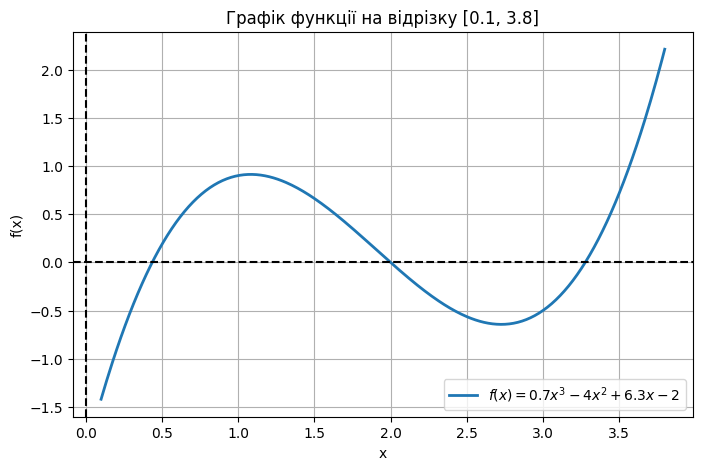

In [419]:
def f(x):
    return 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2


x = np.linspace(0.1, 3.8, 400)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x)=0.7x^3 - 4x^2 + 6.3x - 2$", linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Графік функції на відрізку [0.1, 3.8]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Аналіз графіка функції дозволяє виділити області, в яких розташовані всі корені рівняння. Для точного визначення коренів доцільно розбити відрізок [0.1, 3.8] на три підінтервали:

[0.1, 1], [1, 3] та [3, 3.8]

In [420]:
f3_2_1_bisection, df_last5_1 = bisection(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 0.1, 1, 1e-10)
f3_2_2_bisection, df_last5_2 = bisection(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1, 3, 1e-10)
f3_2_3_bisection, df_last5_3 = bisection(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 3, 3.8, 1e-10)

In [421]:
print(f3_2_1_bisection, f3_2_2_bisection, f3_2_3_bisection)

0.4357322327326984 2.0 3.278553481586278


Згідно того, як я зрозумів завдання,вирішено не додавати порівняння з вбудованою бібліотекою та теоретичними розрахунками.

In [422]:
f3_2_1_regula_falsi, df_last5_1 = regula_falsi(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 0.1, 1, 1e-10)
f3_2_2_regula_falsi, df_last5_2 = regula_falsi(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1, 3, 1e-10)
f3_2_3_regula_falsi, df_last5_3 = regula_falsi(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 3, 3.8, 1e-10)

In [423]:
print(f3_2_1_regula_falsi, f3_2_2_regula_falsi, f3_2_3_regula_falsi)

0.4357322327145979 2.0000000000356644 3.2785534815643618


In [424]:
f3_2_1_mod_reg_fal, df_last5_1 = regula_falsi_modified(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 0.1, 1, 1e-10)
f3_2_2_mod_reg_fal, df_last5_2 = regula_falsi_modified(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 1, 3, 1e-10)
f3_2_3_mod_reg_fal, df_last5_3 = regula_falsi_modified(lambda x: 0.7 * x ** 3 - 4 * x ** 2 + 6.2 * x - 2, 3, 3.8, 1e-10)

In [425]:
print(f3_2_1_mod_reg_fal, f3_2_2_mod_reg_fal, f3_2_3_mod_reg_fal)

0.4357322327301468 2.0000000000640834 3.278553481552873


## Завдання №2

**Метод простої ітерації**

In [7]:
def fixedPoint(f, x0, e):
    x_cur = x0
    last5 = []
    while True:
        x_next = f(x_cur)
        record = {"x_cur": x_cur, "x_next": x_next, "diff": abs(x_next - x_cur)}
        last5.append(record)
        if abs(x_next - x_cur) < e:
            break
        x_cur = x_next
    record = {"x_cur": x_cur, "x_next": x_next, "diff": abs(x_next - x_cur)}
    last5.append(record)
    df_last5 = pd.DataFrame(last5[-5:])
    return x_next, df_last5

In [4]:
def optimal_x0(phi, num_points=1000, plot=True):

    def derivative(f, x, h=1e-12):
        return (f(x + h) - f(x - h)) / (2 * h)
    x0_guess = 0.0
    x1_guess = 1.0
    low = min(x0_guess, x1_guess, phi(x0_guess), phi(x1_guess)) - 1
    high = max(x0_guess, x1_guess, phi(x0_guess), phi(x1_guess)) + 1
    x_vals = np.linspace(low, high, num_points)

    dphi_vals = np.array([abs(derivative(phi, x)) for x in x_vals])

    safe_x_vals = x_vals[dphi_vals < 1]
    if len(safe_x_vals) == 0:
        raise ValueError("Немає інтервалу, де |φ'(x)| < 1 — метод може не збігатися")

    safe_interval = (safe_x_vals[0], safe_x_vals[-1])
    x0_opt = (safe_x_vals[0] + safe_x_vals[-1]) / 2

    if plot:
        plt.figure(figsize=(7,4))
        plt.plot(x_vals, dphi_vals, label=r'$|\phi\'(x)|$', color='green')
        plt.axhline(1, color='red', linestyle='--', label=r'$|\phi\'(x)|=1$')
        plt.title("Модуль похідної φ'(x)")
        plt.xlabel("x")
        plt.ylabel("|φ'(x)|")
        plt.grid(True)
        plt.legend()
        plt.show()

    return x0_opt, safe_interval

**Розв'язання завданнь**

1. $f_1(x) = x^3 +x-1, \; \varepsilon = 10^{-12}$


In [5]:
f_11 = lambda x: - x ** 3 + 1
f_12 = lambda x: np.cbrt(-x + 1)

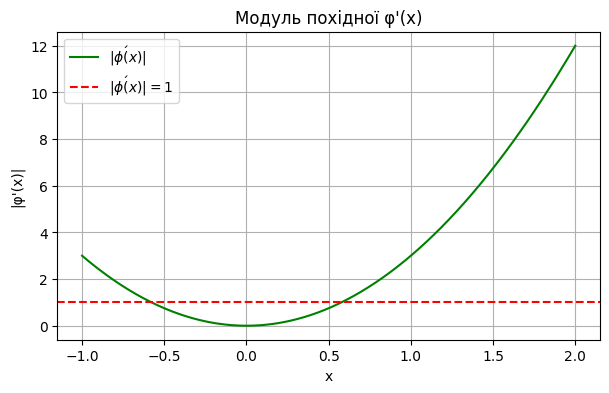

In [6]:
x0_f_11, interval_phi1 = optimal_x0(f_11)

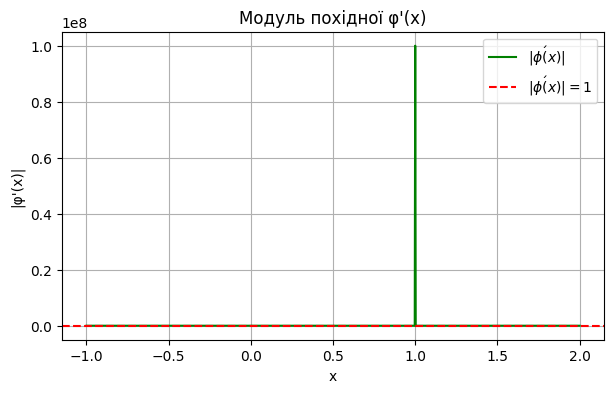

In [7]:
x0_f_12, interval_phi1 = optimal_x0(f_12)

In [ ]:
root_f11, df_last5 = fixedPoint(lambda x: -x**3 + 1, -0.5, 1e-12)

Було зупинено виконання цього методу після 2 хвилин, дуже повільно функція сходиться

In [8]:
root_f12, df_last5 = fixedPoint(lambda x: np.cbrt(-x + 1), 1, 1e-12)

KeyboardInterrupt: 

## Завдання №3


**Метод золотого перерізу**

In [9]:
def golden_search(f, a, b, e):
    golden_ratio = (1 + math.sqrt(5)) / 2
    r = golden_ratio - 1
    x1 = b - r * (b - a)
    x2 = a + r * (b - a)
    last5 = []
    k = 1
    while abs(f(x1) - f(x2)) > e:
        x_k = (a + b) / 2
        record = {"k": k, "a_k": a, "b_k": b, "x_k": x_k, "f_xk": f(x_k)}
        last5.append(record)
        if f(x1) > f(x2):
            a = x1
            x1 = x2
            x2 = a + r * (b - a)
            k += 1
        else:
            b = x2
            x2 = x1
            x1 = b - r * (b - a)
            k += 1
    record = {"k": k, "a_k": a, "b_k": b, "x_k": x_k, "f_xk": f(x_k)}
    last5.append(record)
    df_last5 = pd.DataFrame(last5[-5:])
    x_min = x_k
    return x_min, f(x_min), df_last5

**Метод Фібоначчі**

In [18]:
def fibonacci(f, a, b, e):
    L = b - a
    fn = [0, 1]
    while fn[-1] < L / e:
        fn.append(fn[-1] + fn[-2])
    last5 = []
    K_k = 1
    n = len(fn) - 1
    x1 = a + (fn[n - 2] / fn[n]) * L
    x2 = b - (fn[n - 2] / fn[n]) * L
    for k in range(n - 2):
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a + (fn[n - k - 3] / fn[n - k - 1]) * (b - a)
            record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x1, "f_xk": f(x1)}
            last5.append(record)
        else:
            a = x1
            x1 = x2
            x2 = b - (fn[n - k - 3] / fn[n - k - 1]) * (b - a)
            record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x2, "f_xk": f(x2)}
            last5.append(record)
        K_k += 1

    df_last5 = pd.DataFrame(last5[-5:])
    if f(x1) < f(x2):
        x_min = x1
        f_min = f(x1)
        record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x1, "f_xk": f(x1)}
        last5.append(record)
    else:
        x_min = x2
        f_min = f(x2)
        record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x2, "f_xk": f(x2)}
        last5.append(record)
    return x_min, f_min, df_last5

**Розв'язання завданнь**

$f_1(x) = (x - 1.7)^4 + (x - 1.7)^2 + 0.5, \; x \in [0, 4], \; \varepsilon = 10^{-5}$

In [12]:
x1_min_golden_search, f1_golden_search, df_last5 = golden_search(lambda x: (x - 1.7)**4 + (x - 1.7)**2 + 0.5, 0, 4, 1e-5)

In [13]:
print(x1_min_golden_search, f1_golden_search)

1.6957814524388017 0.5000177964602288


In [14]:
print(df_last5)

    k              a_k              b_k              x_k             f_xk
0   9 1.6656314600e+00 1.7507764050e+00 1.7082039325e+00 5.0006730904e-01
1  10 1.6656314600e+00 1.7182539300e+00 1.6919426950e+00 5.0006492438e-01
2  11 1.6857314550e+00 1.7182539300e+00 1.7019926925e+00 5.0000397084e-01
3  12 1.6857314550e+00 1.7058314499e+00 1.6957814524e+00 5.0001779646e-01
4  13 1.6934089699e+00 1.7058314499e+00 1.6957814524e+00 5.0001779646e-01


In [15]:
x1_min_fibonacci, f1_fibonacci, df_last5 = fibonacci(lambda x: (x - 1.7)**4 + (x - 1.7)**2 + 0.5, 0, 4, 1e-5)

In [16]:
print(x1_min_fibonacci, f1_fibonacci)

1.6999974719434336 0.5000000000063911


In [17]:
print(df_last5)

    k              a_k              b_k              x_k             f_xk
0  24 1.6999896933e+00 1.7000285865e+00 1.7000130292e+00 5.0000000017e-01
1  25 1.6999896933e+00 1.7000130292e+00 1.6999974719e+00 5.0000000001e-01
2  26 1.6999896933e+00 1.7000052506e+00 1.6999974719e+00 5.0000000001e-01
3  27 1.6999974719e+00 1.7000052506e+00 1.7000052506e+00 5.0000000003e-01
4  28 1.6999974719e+00 1.7000052506e+00 1.6999974719e+00 5.0000000001e-01


$f_2(x) = \exp\!\big(0.5(x-2)\big) + (x-2)^6 + 0.1(x-2)^2, \; x \in [-1, 5], \; \varepsilon = 10^{-6}$

In [19]:
x2_min_golden_search, f2_golden_search, df_last5 = golden_search(lambda x: np.exp(0.5 * (x - 2)) + (x - 2)**6 + 0.1 * (x - 2)**2, -1, 5, 1e-6)

In [20]:
print(x2_min_golden_search, f2_golden_search)

1.4616989606258632 0.8173355620787225


In [21]:
print(df_last5)

    k              a_k              b_k              x_k             f_xk
0  13 1.4496634775e+00 1.4682971975e+00 1.4589803375e+00 8.1733778309e-01
1  14 1.4567809252e+00 1.4682971975e+00 1.4625390614e+00 8.1733924321e-01
2  15 1.4567809252e+00 1.4638983729e+00 1.4603396491e+00 8.1733396068e-01
3  16 1.4594995483e+00 1.4638983729e+00 1.4616989606e+00 8.1733556208e-01
4  17 1.4594995483e+00 1.4622181714e+00 1.4616989606e+00 8.1733556208e-01


In [22]:
x2_min_fibonacci, f2_fibonacci, df_last5 = fibonacci(lambda x: np.exp(0.5 * (x - 2)) + (x - 2)**6 + 0.1 * (x - 2)**2, -1, 5, 1e-6)

In [23]:
print(x2_min_fibonacci, f2_fibonacci)

1.460615998001618 0.8173338485270178


In [24]:
print(df_last5)

    k              a_k              b_k              x_k             f_xk
0  29 1.4606127468e+00 1.4606179487e+00 1.4606159980e+00 8.1733384853e-01
1  30 1.4606146975e+00 1.4606179487e+00 1.4606166482e+00 8.1733384853e-01
2  31 1.4606146975e+00 1.4606166482e+00 1.4606153478e+00 8.1733384853e-01
3  32 1.4606153478e+00 1.4606166482e+00 1.4606159980e+00 8.1733384853e-01
4  33 1.4606159980e+00 1.4606166482e+00 1.4606166482e+00 8.1733384853e-01
